In [2]:
import uproot4
import numpy as np
import awkward1 as ak

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import matplotlib.gridspec as gridspec

Configuration

In [4]:
index_carte_side = 32
index_carte_up = 32 
index_carte_corner = 0
masks_in = np.array( [ True , False, False , False , 
                       False , False , False , False , 
                       False , False , True , False , 
                       False , True , False , False , 
                       False , False , False , False , 
                       True , False , True , False , 
                       False , False , False , False , 
                       True , False , False , False  
                     ])
ch_in = np.array( [ 0 , 1, 2 , 3 , 
                   4 , 5, 6, 7, 
                   8, 9, 10  ,11, 
                   12, 13, 14, 15, 
                   16, 17, 18, 19, 
                   20, 21, 22, 23, 
                   24, 25, 26, 27 ,
                   28, 29, 30 , 31 
                     ])

masks_side = np.array( [ False , False , False , False, False, False, False, False])
masks_up = np.array( [False , False , False, False ])
masks_corner = np.array( [ False ])
masks_display = np.reshape(masks_in,(-1,4))
print(masks_display)
print(np.reshape(masks_corner,(1,1)))

[[ True False False False]
 [False False False False]
 [False False  True False]
 [False  True False False]
 [False False False False]
 [ True False  True False]
 [False False False False]
 [ True False False False]]
[[False]]


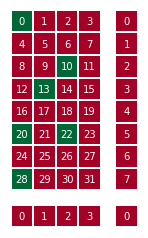

In [5]:

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.2 )
ax1 = grid[0]
ax2 = grid[1]
ax3 = grid[2]
ax4 = grid[3]
sns.heatmap(np.reshape(masks_in,(-1,4)),linewidth=1,ax=ax1,square=True,cbar=False,cmap="RdYlGn",xticklabels=False,yticklabels=False,annot=np.reshape(np.arange(len(masks_in)),(-1,4)))
sns.heatmap(np.reshape(masks_side,(8,1)),linewidth=1,ax=ax2,square=True,cbar=False,cmap="RdYlGn",xticklabels=False,yticklabels=False,annot=np.reshape(np.arange(len(masks_side)),(8,1)))
sns.heatmap(np.reshape(masks_up,(1,4)),linewidth=1,ax=ax3,square=True,cbar=False,cmap="RdYlGn",xticklabels=False,yticklabels=False,annot=np.reshape(np.arange(len(masks_up)),(1,4))) 
sns.heatmap(np.reshape(masks_corner,(1,1)),linewidth=1,ax=ax4,square=True,cbar=False,vmin=0,vmax=1,cmap="RdYlGn",xticklabels=False,yticklabels=False,annot=np.reshape(np.arange(len(masks_corner)),(1,1)))


In [6]:
#file = uproot4.open("pcie40_20201120_160452_main_calo002_1_run_1470.root:DAQ")
file = uproot4.open("pcie40_20210122_102711_main_calo002_1_run_1872.root:DAQ")

In [7]:
llt=file.arrays()

Un cluster est: <br>
| A B | <br>
| C D |

In [8]:
chs   = ak.to_numpy(llt.ch[:,0:32])
print(chs)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 5 6 ... 5 6 7]
 [5 6 7 ... 6 7 8]
 [6 7 8 ... 7 8 9]]


In [7]:
chs_up = ak.to_numpy(llt.ch[:,index_carte_up:index_carte_up+4])
chs_corner = ak.to_numpy(llt.ch[:,index_carte_corner])
chs_side = ak.to_numpy(llt.ch[:,index_carte_side:index_carte_side+29:4])

In [8]:
chs_A = chs*masks_in

In [9]:
chs_B = chs*masks_in
chs_B = np.delete(chs_B,np.s_[0:29:4],axis=1)
chs_B = np.insert(chs_B,[3,6,9,12,15,18,21,24],chs_side[:,:]*masks_side,axis=1)

In [10]:
chs_C = chs*masks_in
chs_C = np.delete(chs_C,np.s_[0:4],axis=1)
chs_C = np.append(chs_C,chs_up*masks_up,axis=1)

In [11]:
chs_D = chs_B
chs_D = np.delete(chs_D,np.s_[0:4],axis=1)
chs_D = np.append(chs_D,chs_up[:,1:4]*masks_up[1:4],axis=1)
chs_D = np.vstack([chs_D.T,chs_corner*masks_corner.T]).T

In [12]:
cands = chs_A+chs_B+chs_C+chs_D

In [14]:
etmax = np.max(cands,axis=1)
add   = np.argmax(cands,axis=1)
ettot = np.sum(chs*masks_in,axis=1)
threshold = 6
mult = np.count_nonzero( chs*masks_in >= threshold , axis = 1 )
#np.set_printoptions(threshold=np.inf)
#print(mult)


In [15]:
llt_etmax = ak.to_numpy(llt.etmax[:,0])
llt_ettot = ak.to_numpy(llt.ettot[:,0])
llt_add   = ak.to_numpy(llt.add[:,0])
llt_mult   = ak.to_numpy(llt.mult[:,0])

[-1, 32, 0, 100000]

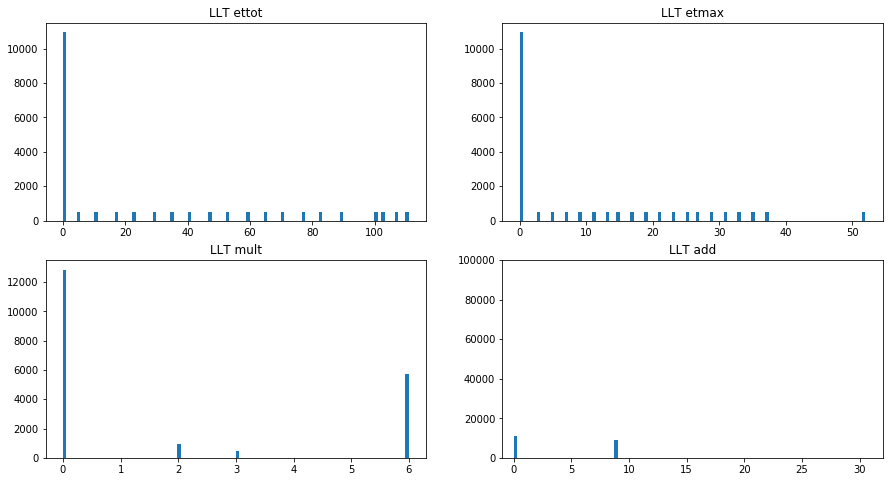

In [16]:
a,((plt1,plt2),(plt3,plt4))=plt.subplots(2,2,figsize=(15,8))
plt1.hist(llt_ettot,100)
plt1.set_title('LLT ettot')
plt2.hist(llt_etmax,100)
plt2.set_title('LLT etmax')
plt3.hist(llt_mult,100)
plt3.set_title('LLT mult')
plt4.hist(llt_add,32)
plt4.set_title('LLT add')
plt4.axis([-1,32,0,100000])

In [17]:
print( "Number of errors for ETMAX = {0}".format(np.count_nonzero(llt_etmax != etmax)))
print( "Number of errors for ETTOT = {0}".format(np.count_nonzero(llt_ettot != ettot)))
print( "Number of errors for ADD   = {0}".format(np.count_nonzero(llt_add != add)))
print( "Number of errors for MULTIPLICTY   = {0}".format(np.count_nonzero(llt_mult != mult)))

Number of errors for ETMAX = 0
Number of errors for ETTOT = 475
Number of errors for ADD   = 0
Number of errors for MULTIPLICTY   = 0


Number of events processed = 19981
Number of events processed = 19981
Fraction of ETMAX error = 0.0
Fraction of ETTOT error = 0.02377258395475702
Fraction of ADD error = 0.0
Fraction of MULT error = 0.0


Text(0.5,1,'Error fraction')

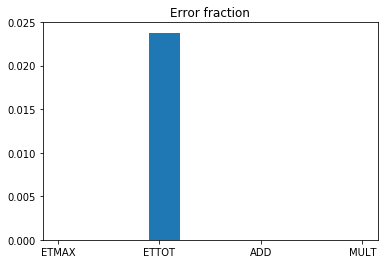

In [18]:
#np.set_printoptions(threshold=np.inf)
#print(add)

nEvts = llt_etmax.size

if (llt_etmax.size != llt_ettot.size) : print( " problem in processing ETMAX vs ETTOT")
if (llt_etmax.size != llt_add.size) : print( " problem in processing ETMAX vs ADD")
if (llt_ettot.size != llt_add.size) : print("  problem in processing ETTOT vs ADD")
print( "Number of events processed = {0}".format(llt_etmax.size))
print( "Number of events processed = {0}".format(nEvts))
fracErr_etmax = np.count_nonzero(llt_etmax != etmax)/nEvts 
fracErr_ettot = np.count_nonzero(llt_ettot != ettot)/nEvts
fracErr_add = np.count_nonzero(llt_add != add)/nEvts
fracErr_mult = np.count_nonzero(llt_mult != mult)/nEvts

#  MH pour voir quelque chose ... 
#fracErr_etmax = .1
#fracErr_ettot = .5
#fracErr_add = .2

#--------------------------------
print( "Fraction of ETMAX error = {0}".format(fracErr_etmax))
print( "Fraction of ETTOT error = {0}".format(fracErr_ettot))
print( "Fraction of ADD error = {0}".format(fracErr_add))
print( "Fraction of MULT error = {0}".format(fracErr_mult))
fracErr_type = ["ETMAX","ETTOT","ADD","MULT"]
fracErr = [fracErr_etmax, fracErr_ettot ,fracErr_add,fracErr_mult]
plt.hist(fracErr_type, 10,weights=fracErr)
plt.title('Error fraction')


x = 
[ 5 17  3  0 31]
y = 
[ 1 17  2  3  4]
DD = 
[ 4  0  1 -3 27]
AA
[ True False  True  True  True]
BB
[[ 1  5]
 [ 0 17]
 [ 1  3]
 [ 1  0]
 [ 1 31]]
Correct = [1 0 1 1 1], Address = [ 5 17  3  0 31]


(0, 32)

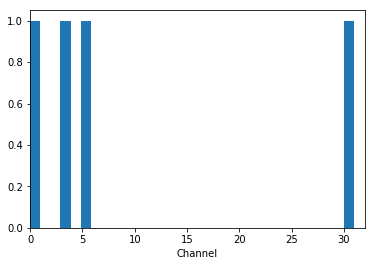

In [18]:
#MH verification 
x = np.array([5,17,3,0,31])
y = np.array([1,17,2,3,4])
DD = x - y 
print ("x = ")
print(x) 
print ("y = ")
print(y) 
print ("DD = ")
print(DD)
AA = np.logical_not(DD==0)
print("AA") 
print (AA) 

BB = np.vstack([AA,x]).T
print("BB") 
print (BB) 
Correct = BB[:,0]
Address = BB[:,1]
print(f"Correct = {Correct}, Address = {Address}")
filter = (Correct == 1) 
plt.hist(Address[filter],32)
plt.xlabel("Channel")
plt.xlim(0, 32)

(0, 32)

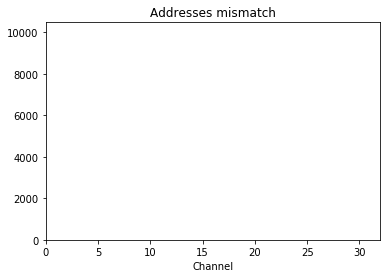

In [19]:
#Address mismatch  plot 

DD = llt_add - add
# True if different addresses ; False if same. 
AA = np.logical_not(DD==0)
BB = np.vstack([AA,add]).T
Correct = BB[:,0]
Address = BB[:,1]
filter = (Correct == 1) 
plt.hist(Address[filter],32)
plt.title('Addresses mismatch')
plt.xlabel("Channel")
plt.xlim(0, 32)